## Author: Dr. Prabhakar Bhimalapuram for Course "Computing in Sciences II" as part of CND program


# RAUNAK SEKSARIA
## 2023113019

# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by:
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have:
$$ Prob(x< M_n < y) = \sum_{r = ⌊nx⌋ }^{r= ⌊ n*y ⌋} P(r;n) $$
where $\lfloor y \rfloor$ is the floor function defined as the largest integer less that $y$.



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

NOTE:
1. scipy.misc.comb function for combinotrics
2. Do this by curve fit of $P$ to a gaussian function

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import math
import random as rand

In [164]:
# this function calculates Prob(M_n) given M and n. p is taken as optional parameter 0.5
def P(M,n,p=1./2):
    q = 1-p
    combinatorial = scp.special.comb(n,M)
    return combinatorial*pow(p,M)*pow(q,n-M)

In [165]:
def plotP(n):
    #x = m/n
    x = []
    # px is probability of x, y function
    px = []
    #the for loop goes over possible M values for given n
    for i in range (n):
        x.append(i/n)
        px.append(P(i,n,0.5))
    return x,px

# Below is the graph of $P$ vs $M_n$

Text(0.5, 1.0, 'Prob(M_n) vs M_n for n=100')

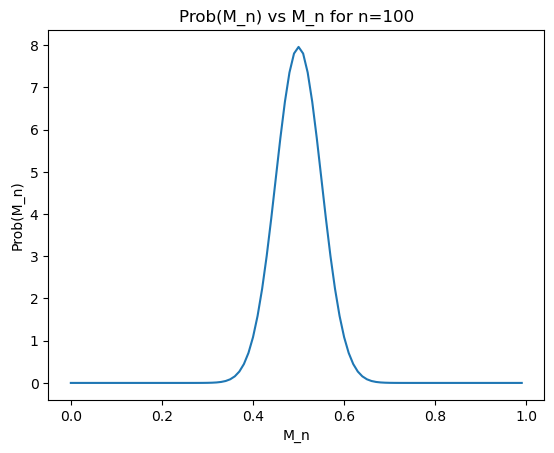

In [166]:
x, y = plotP(100)
y = [i*100 for i in y]
plt.plot(x,y)
plt.xlabel("M_n")
plt.ylabel('Prob(M_n)')
plt.title('Prob(M_n) vs M_n for n=100')

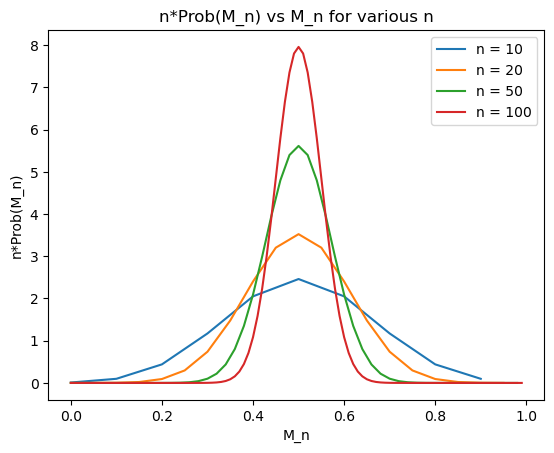

In [167]:
nAr = [10,20,50,100]
for i in nAr:
    x,y = plotP(i)
    y = [j*i for j in y]
    plt.plot(x,y,label=f'n = {i}')
    plt.legend()
    plt.xlabel("M_n")
    plt.ylabel('n*Prob(M_n)')
    plt.title('n*Prob(M_n) vs M_n for various n')    

Text(0.5, 1.0, 'Prob(M_n) vs M_n for n=100 on a log scale')

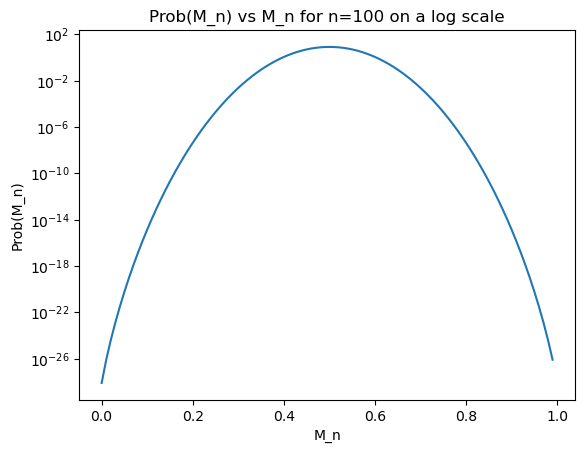

In [168]:
x, y = plotP(100)
y = [i*100 for i in y]
plt.semilogy(x,y)
plt.xlabel("M_n")
plt.ylabel("Prob(M_n)")
plt.title('Prob(M_n) vs M_n for n=100 on a log scale')

In [169]:
# Gaussian function
def gaussian(x,x0,sigma,height):
    '''gaussian function'''
    return height * np.exp(-(x-x0)**2/(2*sigma**2))

**Compare the curve fit to the actual function**

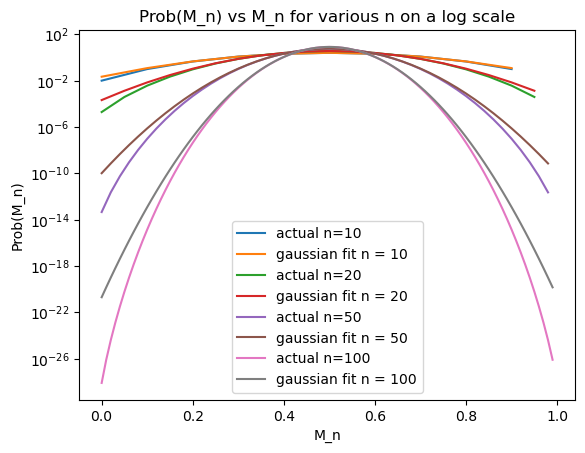

In [170]:
nAr = [10,20,50,100]
for i in nAr:
    x,y = plotP(i)
    y = [j*i for j in y]
    x0 = np.mean(np.array(x))
    #the following line gives the best fitting curve fit based on the gaussian function we have provided and stores it in popt
    #pcov is covariance matrix that is irrelevant to us here
    #p0 = [x0,1,1] are guesses for x0,standard deviation, and height
    popt, pcov = scp.optimize.curve_fit(gaussian, x, y, p0=[x0, 1, 1])
    yfit = gaussian(x, *popt)
    plt.semilogy(x,y,label=f'actual n={i}')
    plt.semilogy(x,yfit,label=f'gaussian fit n = {i}')
    plt.legend()
    plt.xlabel('M_n')
    plt.ylabel('Prob(M_n)')
    plt.title('Prob(M_n) vs M_n for various n on a log scale')

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$. Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

In [171]:
def PinRange(x,y,n,p=1./2):
    rin = math.floor(n*x)
    rfin = math.floor(n*y)
    sum = 0
    for r in range(rin,rfin+1):
        sum = sum + P(r,n,p)
    return sum

In [172]:
def PvsN(x,NRange,p=1./2):
    yAxis = []
    xAxis = []
    for j in NRange:
        xAxis.append(j)
        currY =PinRange(x,1,j,p)
        if currY != 0:
            yAxis.append(currY)
    return xAxis, yAxis

In [ ]:
x = [0.6,0.7,0.8,0.9]
p = 0.5
NX = [i for i in range(1,251)]
for i in x:
    Xplot, Yplot = PvsN(i,NX,p)
    plt.semilogy(Xplot,Yplot,label = f'x ={i}',marker = '.')            
    plt.legend()
    plt.grid(True)
    plt.xlabel('n')
    plt.ylabel('ln Prob(M_n > x)')
    plt.title('ln Prob(M_n > x) as function of n')

#### Task-3: Note that for large $N$, the above plots are linear.  Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

In [ ]:
numPoints = 100
x = np.linspace(0.6,0.9,numPoints)
NX = [i for i in range(100,400)]
I = []
for i in x:
    xp, yp = PvsN(i,NX)
    m,c = np.polyfit(xp,np.log(yp),1)
    I.append(m)
plt.plot(x,I)
plt.title("slope of fitted plots")
plt.xlabel("x")
plt.ylabel("I(x)")
plt.grid(True)
#plotting for numPoints values of x for obtaining a smoother curve

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

Plot a one realisation of $x(t)$ for $t\in[0,100]$


In [ ]:
def randomWalk(t):
    x = 0
    xaxis = []
    yaxis = []
    for i in range(t):
        currSeed = rand.getrandbits(1)
        if(currSeed == 1):
            x = x + 1
        else:
            x = x - 1
        xaxis.append(i)
        yaxis.append(x)
    return xaxis, yaxis

In [ ]:
t = 1000
p,q = randomWalk(t)
plt.plot(p,q)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title(f'random walk for time t={t}')

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$?
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

In [ ]:
def avgx(totaltime, numWalks):
    ar = []
    for i in range(numWalks):
        p,q = randomWalk(totaltime)
        ar.append(q)
    sumAr = []
    for i in range(totaltime):
        temp = 0
        for j in range(numWalks):
            temp = temp + ar[j][i]
        sumAr.append(temp/numWalks)
    return p,sumAr

In [ ]:
def avgx2(totaltime, numWalks):
    ar = []
    for i in range(numWalks):
        p,q = randomWalk(totaltime)
        ar.append([j**2 for j in q])
    sumAr = []
    for i in range(totaltime):
        temp = 0
        for j in range(numWalks):
            temp = temp + ar[j][i]
        sumAr.append(temp/numWalks)
    return p,sumAr

In [ ]:
r, s = avgx(100,1000)
plt.plot(r,s)
plt.title('<x(t)> vs t')
plt.xlabel('t')
plt.ylabel('<x(t)>')

In [ ]:
r, s = avgx2(100,1000)
plt.plot(r,s)
plt.title('<x^2(t)> vs t')
plt.xlabel('t')
plt.ylabel('<x^2(t)>')

# Comment on the error:
The 'error' of the calculation is due to the number of walks we are taking(sampling error), and the general nature of how random processes function. Since +1 and -1 happen on each walk, the graph for <x^2(t)> should be perfectly straight if the sample is big enough.

## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail (or home?), where once the 'drunk' random walker reaches, is trapped for ever.

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$.

## Compute $y_M(t)$ by generating a sample of random walks. Comment.

In [ ]:
def y_m_t(totaltime, numWalks,trappedM):
    ar = []
    for i in range(numWalks):
        p,q = randomWalk(totaltime)
        ar.append(q)
    sumAr = []
    for i in range(totaltime):
        temp = 0
        for j in range(numWalks):
            if(ar[j][i]>=trappedM):
                for k in range(i,totaltime):
                    ar[j][k] = trappedM
                temp = temp + 1
        sumAr.append(temp/numWalks)
    return p,sumAr

In [ ]:
M_list = np.linspace(0,40,15)
for m in M_list:
    a,b = y_m_t(100,1000,m)
    plt.semilogy(a,b,label = f"M = {m}")
    plt.legend()
    plt.ylabel("y_M(t)")
    plt.xlabel("t")
    plt.title(f"Probability of being trapped at M = {m} vs t")
    plt.grid()

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

The relationship between the results obtained in Task-2 and Task-6 lies in the probabilistic nature of both problems. The connection between these tasks is that both involve probabilistic processes evolving over time.
One potential relationship between the two tasks could be the concept of hitting probabilities. In Task-6, \( y_M(t) \) represents the probability of hitting the trap at \( x = M \) at time \( t \). In Task-2, you're essentially calculating hitting probabilities for different thresholds \( x \) (e.g., \( x = 0.6, 0.7, 0.8, 0.9 \)) as the number of coin tosses increases (\( n \)). Both tasks involve understanding the probability of reaching a certain state (heads or trap) over time.

In Task-2, we are dealing with the probability of achieving a certain number of heads (\( M_n \)) in \( n \) coin tosses, given a fair coin. This probability evolves as more coin tosses are performed, and we are interested in how this probability changes as \( n \) increases, for different thresholds \( x \).

In Task-6, we are dealing with a random walk problem where the walker encounters a trap at \( x = M \). We are interested in computing the probability \( y_M(t) \) that the walker is in the trap at time \( t \), given that it started at \( x = 0 \) at \( t = 0 \). By generating a sample of random walks, we can estimate \( y_M(t) \) over time.